<h2>INF 385T UTexas:: byron wallace</h2>
Sp 2016
Sample work-through for exercises 1 & 3 in HW1


<h3>Exercise 1</h3>

In [1]:
###
# all the imports that we will use
import math
import random
from collections import defaultdict
# hide warnings to keep things tidy.
import warnings
warnings.filterwarnings('ignore')

import numpy as np 

import sklearn 
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn import tree # decision trees!
from sklearn.externals.six import StringIO 

import pandas as pd
from pandas.tools.plotting import andrews_curves

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
matplotlib.style.use('ggplot') # make things a bit prettier.

In [2]:
# (a) load in the data
from sklearn.datasets import load_boston
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df["price"] = dataset.target
print(df.head())

      CRIM  ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  price  
0  396.90   4.98   24.0  
1  396.90   9.14   21.6  
2  392.83   4.03   34.7  
3  394.63   2.94   33.4  
4  396.90   5.33   36.2  


In [3]:
# (b)
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


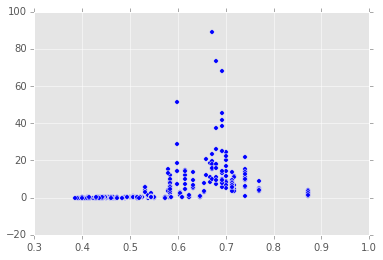

In [4]:
# (c)
plt.scatter(df["NOX"], df["CRIM"]);

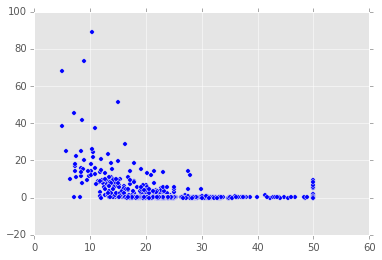

In [5]:
plt.scatter(df["price"], df["CRIM"]);

In [6]:
###
# here is the implementation from our text (data science from scratch)
# which I am using, rather than an existing package (as one would normally).
# the following is due to Joel Grus, taken from:
#    https://github.com/joelgrus/data-science-from-scratch/blob/master/code-python3
#
# reproducing all of this here is a crude way of proceeding; we may
# have instead just imported the module!
###

def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

def mean(x):
    return sum(x) / len(x)

def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x):
    """assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

def standard_deviation(x):
    return math.sqrt(variance(x))

def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0 # if no variation, correlation is zero

In [7]:
print (correlation(df["NOX"], df["CRIM"]))

0.417521431105


In [8]:
print (correlation(df["price"], df["CRIM"]))

-0.385831689884


<h3>Exercise 3</h3>

In [13]:
p = 0.5
num_runs = 10000
num_flips = 4

# this will map strings of possible
# outcomes (e.g., HHTH) to counts.
outcome_counts = defaultdict(int)
for run in range(num_runs):
    cur_seq = []
    for flip in range(num_flips):
        outcome = "H" if random.random() >= 0.5 else "T"
        cur_seq.append(outcome)
    outcome_counts["".join(cur_seq)] += 1
print(outcome_counts)

defaultdict(<class 'int'>, {'THTH': 621, 'HTHH': 636, 'THHH': 629, 'TTTH': 637, 'TTHH': 602, 'HTTH': 652, 'THTT': 638, 'THHT': 633, 'HTTT': 640, 'HHTH': 620, 'HHHH': 599, 'TTTT': 612, 'HTHT': 640, 'TTHT': 651, 'HHTT': 582, 'HHHT': 608})


In [10]:
outcome_counts['HHHH']/num_runs

0.0628

In [11]:
##
# does this agree with the analytical solution??
(.5)**4

0.0625

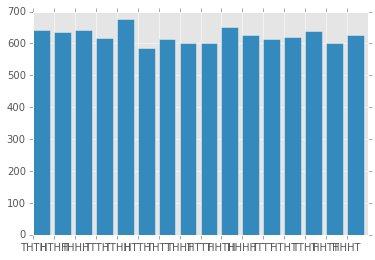

In [12]:
# a histogram, just for kicks.
X = [x+10 for x in list(range(len(outcome_counts)))]
plt.bar(X, outcome_counts.values())
ticks = plt.xticks(X, list(outcome_counts.keys()))